# Conformado en haz cuadrado con far_field

**@Author**: Luis Miguel Sánchez Brea

**@Date**:   15/10/2020

**Information**: R. W. Gerchberg and W. O. Saxton, “A Practical Algorithm for the Determination of Phase from Image and Diffraction Plane Pictures,” Optik (Stuttg)., vol. 35, no. 2, pp. 237–246, 1972. 

## Introduction
Here we see an implementation of Gerchberg-Saxton Algorithm using Diffractio module.

Target can be either an image or any other function XY mask defined using diffractio.scalar_masks_XY.

In [ ]:
from copy import deepcopy

In [22]:
from diffractio import um, mm, nm, np, sp, plt
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from py_aocg.ifta.algorithms import GS_algorithm, verify_mask, GS_scalar_Fresnel, compute_error, make_binary

In [3]:
num_x=512
num_y=512
pixel_size=10*um
DOE_size=pixel_size*num_x

x=np.linspace(-DOE_size/2,DOE_size/2, num_x)
y=np.linspace(-DOE_size/2,DOE_size/2, num_y)
wavelength=0.6328*um

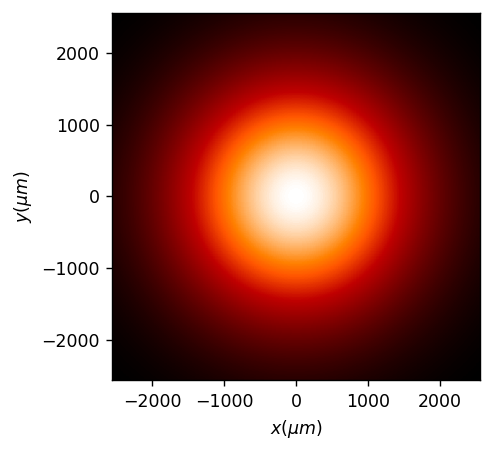

In [4]:
source=Scalar_source_XY(x,y,wavelength)
source.gauss_beam(r0=(0,0), w0=2500*um, z0=0)
source.draw();

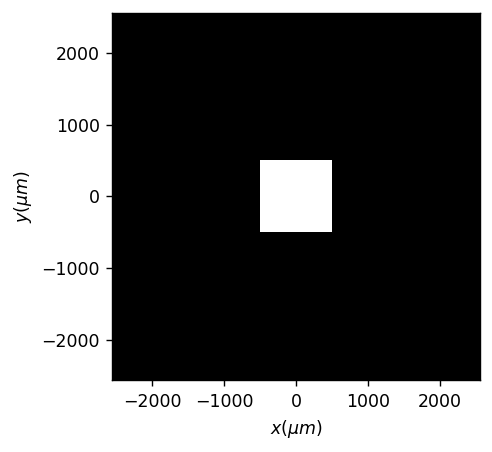

In [5]:
target=Scalar_mask_XY(x,y,wavelength)
target.square(r0=(0,0),size=(1000*um,1000*um), angle=0)
target.draw(colormap_kind='gray');

In [6]:
is_phase=True
is_binary=False

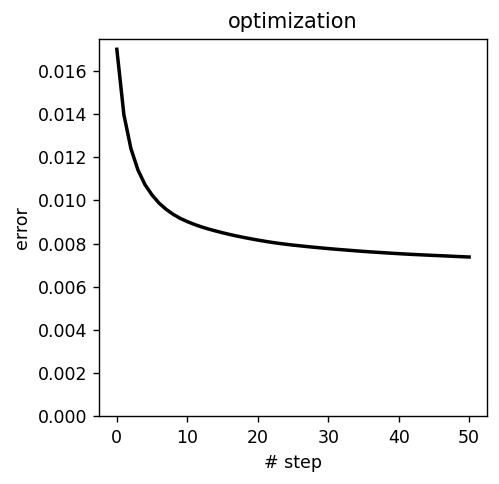

In [23]:
mask, errors = GS_algorithm(source,  target, num_steps=51, has_draw=True)

In [24]:
mask.save_mask(filename='conformado_far_field_c.bmp', info='CEIT ');

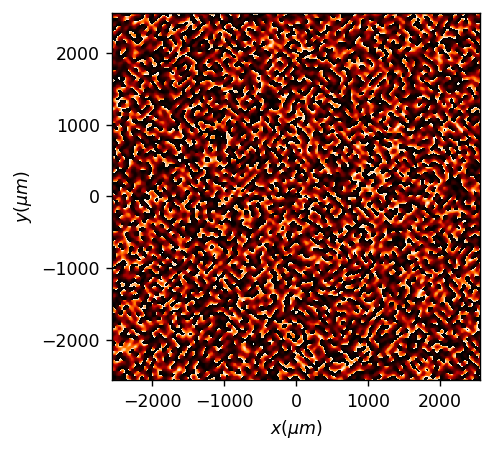

In [25]:
mask.draw('intensity');

In [26]:
mask_binary=make_binary(mask)

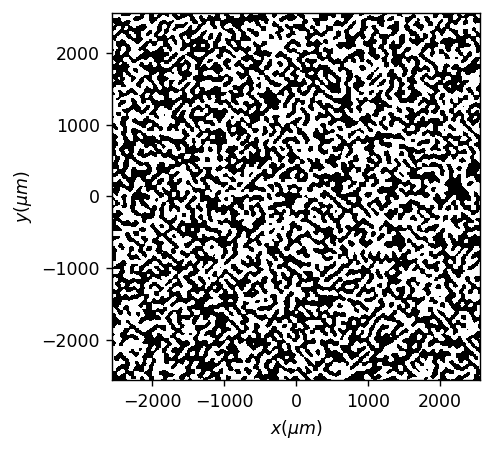

In [27]:
mask_binary.draw('intensity');

In [28]:
mask_binary.save_mask(filename='conformado_far_field_b.bmp', info='CEIT ');

### Verification phase

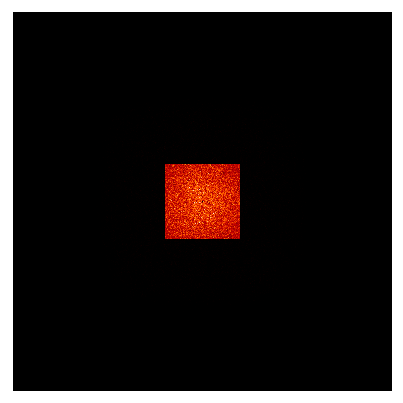

In [29]:
verify_mask(x,y, wavelength, filename='conformado_far_field_c.bmp', z=None, 
            has_mask=False, is_phase=True, is_binary=False, has_draw=True, has_axis=False, is_logarithm=0);

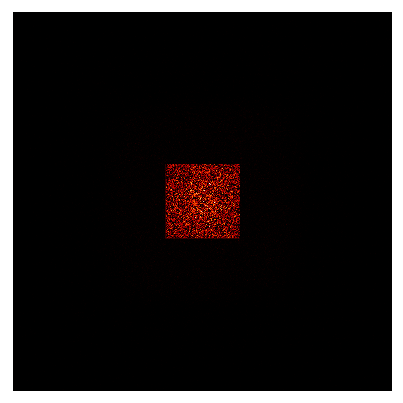

In [30]:
verify_mask(x,y, wavelength, filename='conformado_far_field_b.bmp', z=None, 
            has_mask=False, is_phase=True, is_binary=True, has_draw=True, has_axis=False, is_logarithm=0);

### Verification amplitude

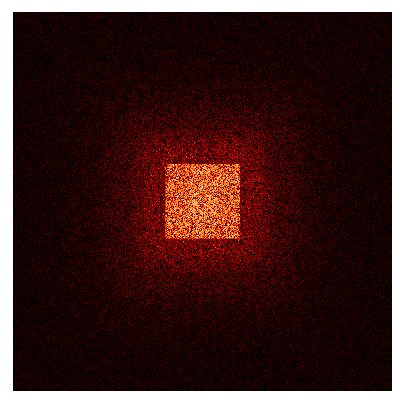

In [31]:
verify_mask(x,y, wavelength, filename='conformado_far_field_c.bmp', z=None, 
            has_mask=False, is_phase=False, is_binary=False, has_draw=True, has_axis=False, is_logarithm=0.0001);

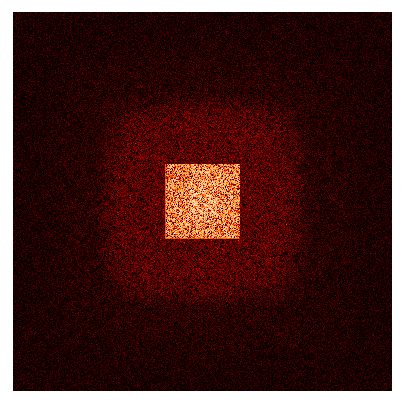

In [32]:
verify_mask(x,y, wavelength, filename='conformado_far_field_b.bmp', z=None, 
            has_mask=False, is_phase=False, is_binary=True, has_draw=True, has_axis=False, is_logarithm=0.0001);